## Comparação Jacobi X Numba

In [1]:
import numpy as np

from numba import cuda

import time

import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
@cuda.jit
def gpu_iter(x, x0, A, b, n, m_iter):    
    pos = cuda.grid(1)

    # bound check
    if pos < n:
        # max inters  
        for _ in range(m_iter):
            # iteracao de Jacobi
            x[pos] = b[pos]  
            for j in range(n):
                if j != pos:  
                    x[pos] -= A[pos, j] * x0[j]
    
            if A[pos, pos] != 0:
                x[pos] /= A[pos, pos]

            x0[pos] = x[pos]


def jacobi_gpu(A, b, max_iter=50):
    n = b.size
    x = np.zeros(n, dtype=np.float64)
    x0 = np.zeros(n, dtype=np.float64)   

    threadsperblock = 64
    blockspergrid = (n + (threadsperblock - 1)) // threadsperblock

    gpu_iter[blockspergrid, threadsperblock](x, x0, A, b, n, max_iter)
    
    return x


In [4]:
def generate_matrix(n):
    return np.random.rand(n, n)
    
def generate_Bvector(n):
    return np.random.rand(n)

In [5]:
n = 512 #600
A = generate_matrix(n)
b = generate_Bvector(n)

In [6]:
iterations = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

def evalTime(iterations):
    times = []
    for it in iterations:
        TimeVector = []
        for _ in range(100):
            start_time = time.time()
            jacobi_gpu(A, b, it)
            end_time = time.time()
            t = end_time - start_time
            TimeVector.append(t)
        times.append(np.mean(TimeVector))
    return times

runtimes = evalTime(iterations)
runtimes

/home/ygor/ygor/ic/graphics/venv/lib/python3.10/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (8) < 2 * SM count (32) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/home/ygor/ygor/ic/graphics/venv/lib/python3.10/site-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/home/ygor/ygor/ic/graphics/venv/lib/python3.10/site-packages/numba/cuda/compiler.py:726: NumbaPerformanceWarning: Grid size (8) < 2 * SM count (32) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


[0.007277238368988037,
 0.0038657522201538085,
 0.005524206161499024,
 0.005922775268554687,
 0.007407686710357666,
 0.012081966400146485,
 0.022170727252960206,
 0.03297119617462158,
 0.04331107139587402,
 0.052252182960510256]

In [7]:
data = pd.DataFrame(data={'Iterations': iterations, 'Runtimes': runtimes})
data

,Iterations,Runtimes
0,10,0.007277
1,20,0.003866
2,30,0.005524
3,40,0.005923
4,50,0.007408
5,100,0.012082
6,200,0.022171
7,300,0.032971
8,400,0.043311
9,500,0.052252


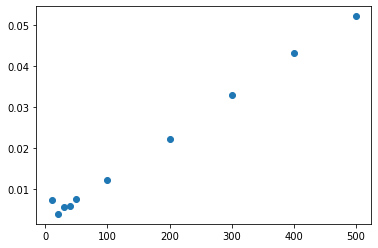

In [8]:
plt.scatter(data['Iterations'], data['Runtimes'])

In [9]:
data2 = [[10,20,30,40,50],[0.003485,0.003793,0.005032,0.005989,0.007450]]

Text(0, 0.5, 'tempo')

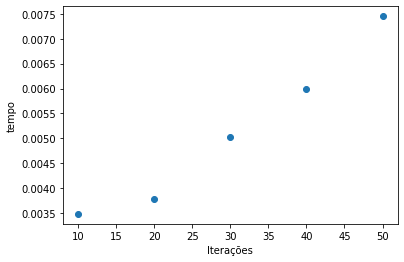

In [10]:
plt.scatter(data2[0], data2[1])
plt.xlabel("Iterações")
plt.ylabel("tempo")

### Tomando os 5 primeiros dados

Text(0, 0.5, 'tempo')

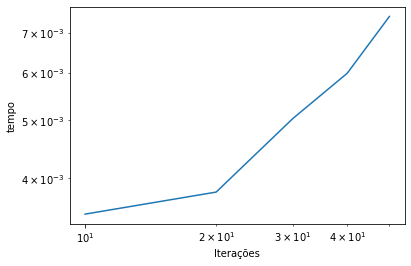

In [11]:
plt.loglog(data2[0], data2[1])
plt.xlabel("Iterações")
plt.ylabel("tempo")

A cada 10 iterações o tempo de execução aumenta 0.001s